In [1]:
# Estimate the Fama French Carhart Four-Factor Risk Model on Stocks

import numpy as np 
import pandas as pd 
import pandas_datareader
import matplotlib.pyplot as plt
!pip3 install yfinance
import yfinance as yf

In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start='1926-01-01'

In [4]:
ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

In [5]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.38 -2.73  0.22
 1926-08    2.64 -1.47  4.14  0.25
 1926-09    0.36 -1.39  0.12  0.23
 1926-10   -3.24 -0.13  0.65  0.32
 1926-11    2.53 -0.16 -0.38  0.31
 ...         ...   ...   ...   ...
 2022-02   -2.29  2.18  3.09  0.00
 2022-03    3.05 -1.61 -1.82  0.01
 2022-04   -9.46 -1.40  6.16  0.01
 2022-05   -0.34 -1.87  8.38  0.03
 2022-06   -8.43  2.09 -5.93  0.06
 
 [1152 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.83  -3.40  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.69  11.65  4.75
 1930  -31.23  -5.34 -11.76  2.41
 1931  -45.11   3.64 -14.56  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -5.02 -13.51  0.80
 2018   -6.95  -3.29  -9.80  1.83
 2019   28.28  -6.13 -10.20  2.15
 2020   23.66  12.96 -46.46  0.45
 2021   23.56  -3.97  25.55  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [6]:
ff_df=ff[0]

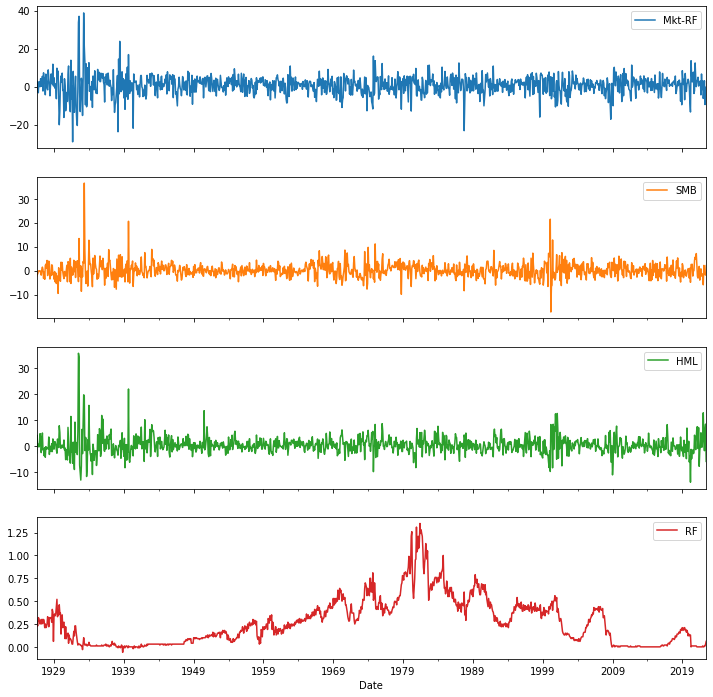

In [7]:
ff_df.plot(subplots=True, figsize=(12,12));

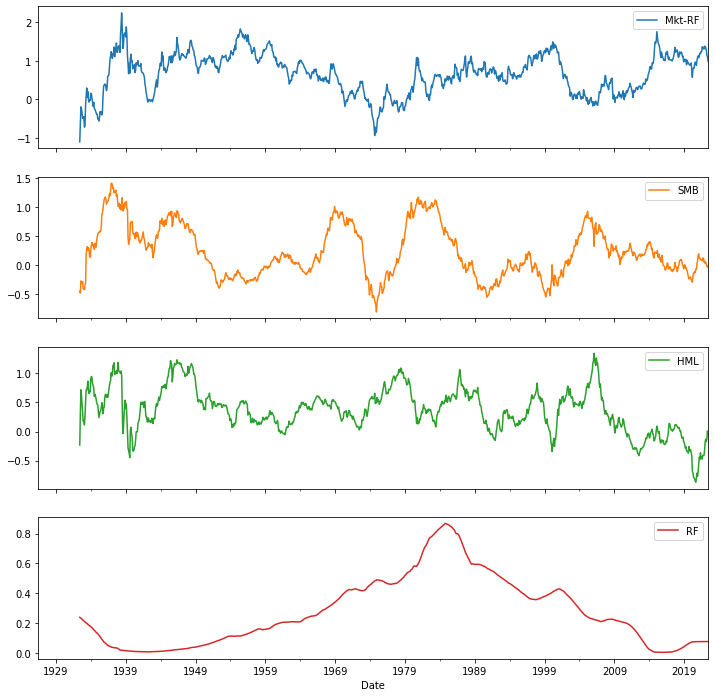

In [8]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,12));

In [9]:
ff_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M', start=start).read()[0]

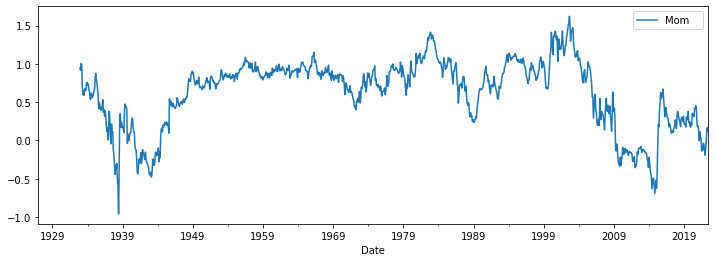

In [10]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4));

In [11]:
ffac_merged_df=pd.merge(ff_df,ff_mom_df,on='Date',how='inner', sort=True, copy=True, indicator=False,validate='one_to_one')

In [12]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.51,4.73,0.25,0.36
1927-02,4.18,-0.25,3.27,0.26,-2.14
1927-03,0.13,-1.89,-2.56,0.30,3.61
1927-04,0.46,0.49,0.71,0.25,4.30
1927-05,5.44,1.46,4.98,0.30,3.00
...,...,...,...,...,...
2022-02,-2.29,2.18,3.09,0.00,1.75
2022-03,3.05,-1.61,-1.82,0.01,2.98
2022-04,-9.46,-1.40,6.16,0.01,4.88


In [13]:
#ARMCO_df=pandas_datareader.get_data_yahoo('2222.SR',start=start)['Adj Close'].resample('M').ffill().pct_change()

In [14]:
yf.pdr_override()
ARMCO_Y_data=pandas_datareader.data.get_data_yahoo('2222.SR', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [15]:
ARMCO_df=ARMCO_Y_data.to_frame()
ARMCO_df

,Adj Close
Date,
2019-12-31,NaN
2020-01-31,-0.031206
2020-02-29,-0.023426
2020-03-31,-0.093646
2020-04-30,0.049751
2020-05-31,0.067661
2020-06-30,0.083333
2020-07-31,0.015385
2020-08-31,0.088775


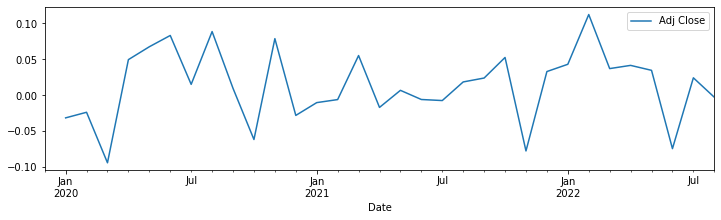

In [16]:
ARMCO_df.plot(subplots=True, figsize=(12,3));

In [17]:
ARMCO_df.index.dtype

dtype('<M8[ns]')

In [18]:
ffac_merged_df.index.dtype

period[M]

In [19]:
ARMCO_df['str_date'] = ARMCO_df.index.astype(str)
ARMCO_df['dt_date'] = pd.to_datetime(ARMCO_df['str_date']).dt.strftime('%Y-%m')
ARMCO_df.dt_date.dtype

dtype('O')

In [20]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [21]:
ARMCO_ffac_merged_df=pd.merge(ARMCO_df,ffac_merged_df,on='dt_date',how='inner', sort=True, copy=True, indicator=False,validate='one_to_one')

In [22]:
ARMCO_ffac_merged_df.drop(columns=['str_date_x','str_date_y'],inplace=True)

In [23]:
ARMCO_ffac_merged_df.rename(columns={'Adj Close':'ARAMCO (2222)'},inplace=True)
ARMCO_ffac_merged_df.rename(columns={'Mom   ':'MOM'},inplace=True)

In [24]:
ARMCO_ffac_merged_df['ARMCO_RF']=ARMCO_ffac_merged_df['ARAMCO (2222)']*100-ARMCO_ffac_merged_df['RF']

In [25]:
ARMCO_ffac_merged_df.dropna(axis=0,inplace=True)

In [26]:
ARMCO_ffac_merged_df

,ARAMCO (2222),dt_date,Mkt-RF,SMB,HML,RF,MOM,ARMCO_RF
1,-0.031206,2020-01,-0.11,-3.13,-6.17,0.13,5.98,-3.250572
2,-0.023426,2020-02,-8.13,1.02,-3.75,0.12,-0.40,-2.462607
3,-0.093646,2020-03,-13.39,-4.89,-13.92,0.13,7.97,-9.494555
4,0.049751,2020-04,13.65,2.56,-1.30,0.00,-5.23,4.975128
5,0.067661,2020-05,5.58,2.53,-4.92,0.01,0.42,6.756124
6,0.083333,2020-06,2.46,2.67,-2.12,0.01,-0.73,8.323334
7,0.015385,2020-07,5.77,-2.28,-1.53,0.01,7.64,1.528460
8,0.088775,2020-08,7.63,-0.28,-2.95,0.01,0.55,8.867505
9,0.009845,2020-09,-3.63,0.05,-2.58,0.01,3.14,0.974542
10,-0.061281,2020-10,-2.10,4.40,4.14,0.01,-3.04,-6.138145


In [27]:
from statsmodels.api import OLS
results=OLS(ARMCO_ffac_merged_df['ARMCO_RF'],ARMCO_ffac_merged_df[['Mkt-RF','SMB','HML','MOM']],missing='drop').fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ARMCO_RF   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              4.255
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                     0.00882
Time:                        12:13:10   Log-Likelihood:                         -84.707
No. Observations:                  30   AIC:                                      177.4
Df Residuals:                      26   BIC:                                      183.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4859      0.150      3.246      0.003       0.178       0.794
SMB           -0.0022      0.283     -0.008      0.994      -0.585       0.580
HML            0.3913      0.162      2.420      0.023       0.059       0.724
MOM            0.2123      0.234      0.906      0.373      -0.269       0.694
==============================================================================
Omnibus:                        0.828   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.463
Skew:                           0.304   Prob(JB):                        0.793
Kurtosis:                       2.960   Cond. No.                         2.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# To run regression with an intercept
import statsmodels.tools
ARMCO_ffac_merged_df_c=statsmodels.tools.add_constant(ARMCO_ffac_merged_df,prepend=True)

In [30]:
ARMCO_ffac_merged_df_c

,const,ARAMCO (2222),dt_date,Mkt-RF,SMB,HML,RF,MOM,ARMCO_RF
1,1.0,-0.031206,2020-01,-0.11,-3.13,-6.17,0.13,5.98,-3.250572
2,1.0,-0.023426,2020-02,-8.13,1.02,-3.75,0.12,-0.40,-2.462607
3,1.0,-0.093646,2020-03,-13.39,-4.89,-13.92,0.13,7.97,-9.494555
4,1.0,0.049751,2020-04,13.65,2.56,-1.30,0.00,-5.23,4.975128
5,1.0,0.067661,2020-05,5.58,2.53,-4.92,0.01,0.42,6.756124
6,1.0,0.083333,2020-06,2.46,2.67,-2.12,0.01,-0.73,8.323334
7,1.0,0.015385,2020-07,5.77,-2.28,-1.53,0.01,7.64,1.528460
8,1.0,0.088775,2020-08,7.63,-0.28,-2.95,0.01,0.55,8.867505
9,1.0,0.009845,2020-09,-3.63,0.05,-2.58,0.01,3.14,0.974542
10,1.0,-0.061281,2020-10,-2.10,4.40,4.14,0.01,-3.04,-6.138145


In [31]:
# To calculate returns on Alpha plus exposures to each of the four
# risk parameters
results=OLS(ARMCO_ffac_merged_df_c['ARMCO_RF'],ARMCO_ffac_merged_df_c[['const','Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ARMCO_RF   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3.799
Date:                Wed, 17 Aug 2022   Prob (F-statistic):             0.0151
Time:                        12:13:10   Log-Likelihood:                -84.053
No. Observations:                  30   AIC:                             178.1
Df Residuals:                      25   BIC:                             185.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8658      0.820      1.056      0.301      -0.822       2.554
Mkt-RF         0.4562      0.152      3.001      0.006       0.143       0.769
SMB           -0.0177      0.283     -0.062      0.951      -0.601       0.566
HML            0.3689      0.163      2.267      0.032       0.034       0.704
MOM            0.1644      0.238      0.690      0.496      -0.326       0.655
==============================================================================
Omnibus:                        1.003   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.508
Skew:                           0.318   Prob(JB):                        0.776
Kurtosis:                       3.043   Cond. No.                         7.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""